In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Charger les données
data = pd.read_csv("data/Processed_Anti_Inflammatory_Compounds.csv")

# Séparer les variables explicatives (X) et la variable cible (y)
X = data.drop(columns=["anti_inflammatory", "isosmiles"])  # Remplace "anti_inflammatory" par le nom exact de ta colonne cible
y = data["anti_inflammatory"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser et ajuster le modèle ADL
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = lda.predict(X_test)

# Évaluer les performances
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.82      0.73       319
           1       0.65      0.44      0.53       246

    accuracy                           0.65       565
   macro avg       0.65      0.63      0.63       565
weighted avg       0.65      0.65      0.64       565

Matrice de confusion :
 [[260  59]
 [137 109]]
Accuracy : 65.31%


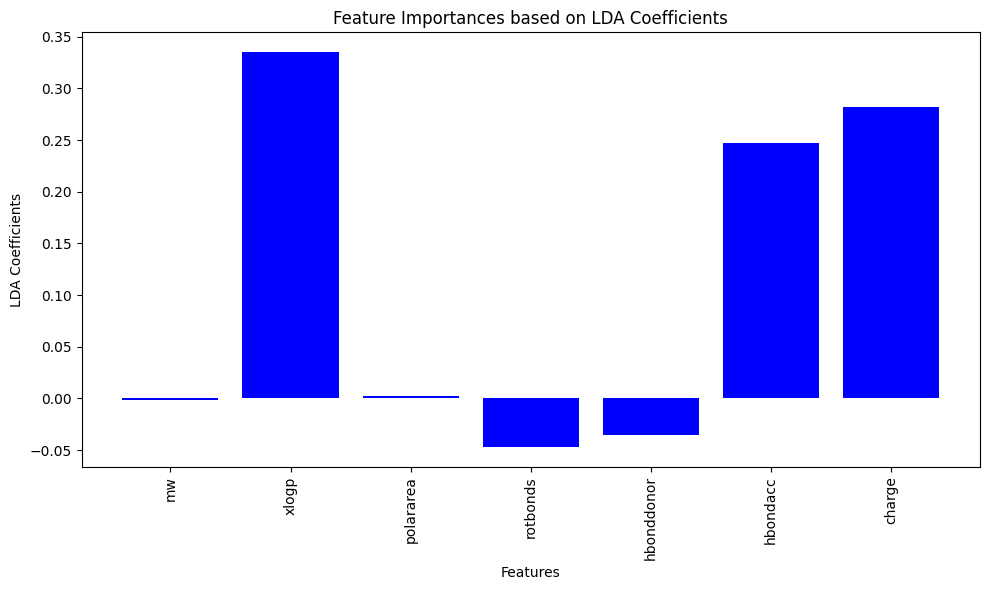

In [2]:
import matplotlib.pyplot as plt
coefficients = lda.coef_[0]  # Les coefficients de la transformation linéaire

# Créer un graphique pour afficher l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('LDA Coefficients')
plt.title('Feature Importances based on LDA Coefficients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
